# Permutation test

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
tsetse_data = pd.read_csv("../data/processed/TseTse_processed.csv")

In [3]:
tsetse_data_sameages = tsetse_data[(tsetse_data["Age"]!= '3d')]
tsetse_data_sameages_copy = tsetse_data_sameages.copy()

tsetse_head = tsetse_data_sameages_copy.loc[tsetse_data_sameages_copy['Tissue'] == 'Head']

X_sex_head = tsetse_head.loc[:,"4000":"402"]
y_sex_head = tsetse_head.loc[:,"Sex"]

In [4]:
# permutation test

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

clf = SVC(kernel="linear", random_state=7)
cv = StratifiedKFold(2, shuffle=True, random_state=0)

score_sex, perm_scores_sex, pvalue_sex = permutation_test_score(
    clf, X_sex_head, y_sex_head, scoring="accuracy", cv=cv, n_permutations=1000)

In [5]:
tsetse_males_head = tsetse_data.loc[(tsetse_data['Sex'] == 'm') & (tsetse_data['Tissue'] == 'Head')]

X_males_head = tsetse_males_head.loc[:,"4000":"402"]
y_males_head = tsetse_males_head.loc[:,"Age"]

In [6]:
score_males, perm_scores_males, pvalue_males = permutation_test_score(
    clf, X_males_head, y_males_head, scoring="accuracy", cv=cv, n_permutations=1000)

In [7]:
tsetse_females_head = tsetse_data.loc[(tsetse_data['Sex'] == 'f') & (tsetse_data['Tissue'] == 'Head')]

X_females_head = tsetse_females_head.loc[:,"4000":"402"]
y_females_head = tsetse_females_head.loc[:,"Age"]

In [8]:
score_females, perm_scores_females, pvalue_females = permutation_test_score(
    clf, X_females_head, y_females_head, scoring="accuracy", cv=cv, n_permutations=1000)

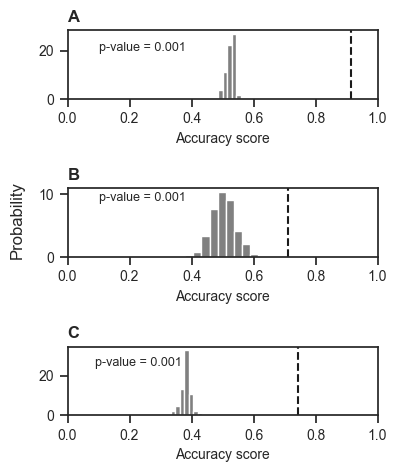

In [20]:
rc={'font.size': 12,
    "font.family":"Arial",
    "axes.labelsize":10,
    'xtick.labelsize':10,
    'ytick.labelsize':10}

sn.set_style("ticks")
sn.set_context('notebook', rc=rc)
sn.set_palette('bright', color_codes=True)

fig, axs = plt.subplots(3,figsize=(4,5))
axs[0].hist(perm_scores_sex, density=True, color='grey')
axs[0].axvline(score_sex, ls="--", color="k")
score_label = f"p-value = {pvalue_sex:.3f}"
axs[0].text(0.1, 20, score_label, fontsize=9)

axs[1].hist(perm_scores_males, density=True, color='grey')
axs[1].axvline(score_males, ls="--", color="k")
score_label_male = f"p-value = {pvalue_males:.3f}"
axs[1].text(0.1, 9, score_label_male, fontsize=9)


axs[2].hist(perm_scores_females, density=True, color='grey')
axs[2].axvline(score_females, ls="--", color="k")
score_label_female = f"p-value = {pvalue_females:.3f}"
axs[2].text(0.09, 25, score_label_female, fontsize=9)




fig.text(x=0,
        y=0.5,
        s="Probability",
        rotation='vertical', 
        horizontalalignment='center',
        verticalalignment='center')
axs[0].set_xlim(0,1)
abcd = ["A", "B", "C"]
for ax,l in zip(axs.flat,abcd):
    ax.set_title(l, fontweight='bold', loc='left')

axs[0].set_xlabel("Accuracy score")
axs[0].set_xlim(0,1)

axs[1].set_xlabel("Accuracy score")
axs[1].set_xlim(0,1)
axs[2].set_xlabel("Accuracy score")
axs[2].set_xlim(0,1)

plt.subplots_adjust(hspace=1.3)



plt.savefig("../results/plots/FigS1.png", dpi=300, bbox_inches='tight')